In [1]:
import torch
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer

**distilbert-base-uncased**

**Task A**

In [2]:
model_path = "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/results/checkpoint-13020"

model = AutoModelForSequenceClassification.from_pretrained(
        model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)


In [4]:
with torch.no_grad():
            text = "Women and men are not equal"
            
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            predicted_class_id = np.argmax(outputs.logits.numpy()[0])
            print(model.config.id2label[predicted_class_id])

sexist


In [5]:
from datasets import load_dataset

In [6]:
df = load_dataset("json", data_files={
        "train": f'preprocessed\label_sexist_train.json', "validation": f'preprocessed\label_sexist_valid.json'})
df["validation"]

Using custom data configuration default-21b835701c0e941c
Found cached dataset json (C:/Users/mufdu/.cache/huggingface/datasets/json/default-21b835701c0e941c/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/2 [00:00<?, ?it/s]

Dataset({
    features: ['idx', 'text', 'label'],
    num_rows: 3470
})

In [7]:
import pandas as pd
df = pd.DataFrame(df["validation"])
df = df.drop('idx', axis=1)
df.head()

,text,label
0,izzat wassermans sister jew nose,0
1,if you live with a single mother you are a idiot,1
2,bicycles bikini girls and a loaded shotgun,0
3,maybe she is trying to rape him,0
4,hey girl you can spank me anytime you want i l...,0


In [8]:
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [9]:
true_vals = df['label'].tolist()
# true_vals

In [10]:
predicted_vals = []
for t in df['text'].tolist():
    with torch.no_grad():
                # text = "Women and men are equal"
                inputs = tokenizer(t, return_tensors="pt")
                outputs = model(**inputs)
                predicted_class_id = np.argmax(outputs.logits.numpy()[0])
                predicted_vals.append(predicted_class_id)
                # print(model.config.id2label[predicted_class_id])

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [12]:
accuracy = accuracy_score(y_true = true_vals, y_pred = predicted_vals )
f1 = f1_score(y_true = true_vals, y_pred = predicted_vals, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = true_vals, y_pred = predicted_vals ))

The accuracy from sentiment classification: 0.8109510086455332
with f1 score: 0.8103271743166742
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2120
           1       0.77      0.74      0.75      1350

    accuracy                           0.81      3470
   macro avg       0.80      0.80      0.80      3470
weighted avg       0.81      0.81      0.81      3470



Text(0.5, 1.0, 'Sentiment classification')

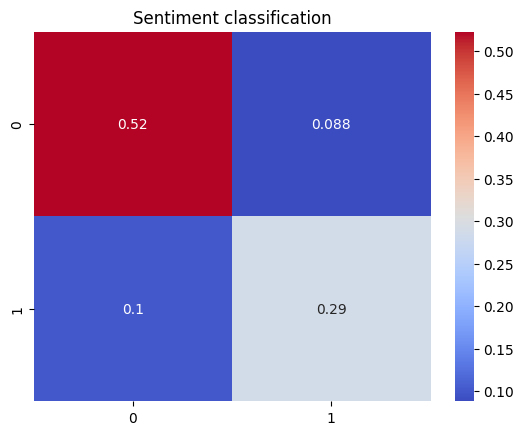

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_true= true_vals, y_pred = predicted_vals) / len(predicted_vals), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [14]:
model_path = "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/results/checkpoint-5070"

model = AutoModelForSequenceClassification.from_pretrained(
        model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [15]:
with torch.no_grad():
            text = "I personally would have hit that bitch and she'd never have done it again"
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            predicted_class_id = np.argmax(outputs.logits.numpy()[0])
            print(model.config.id2label[predicted_class_id])

1. threats, plans to harm and incitement


In [16]:
df = load_dataset("json", data_files={
        "train": f'preprocessed\label_category_train.json', "validation": f'preprocessed\label_category_valid.json'})
df["validation"]

Using custom data configuration default-df62291aa9247eac
Found cached dataset json (C:/Users/mufdu/.cache/huggingface/datasets/json/default-df62291aa9247eac/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/2 [00:00<?, ?it/s]

Dataset({
    features: ['idx', 'text', 'label'],
    num_rows: 1350
})

In [17]:
import pandas as pd
df = pd.DataFrame(df["validation"])
df = df.drop('idx', axis=1)
df.head()

,text,label
0,unless they are much older it is amazing how c...,1
1,how to cut your sons life by 60 call him daughter,2
2,good for you personally that inner warm and fu...,1
3,tell her she better not come back with her ass...,0
4,turdreich neetsoc bloodsoiltendies he uses you...,1


In [18]:
true_vals = df['label'].tolist()

In [19]:
predicted_vals = []
for t in df['text'].tolist():
    with torch.no_grad():
                inputs = tokenizer(t, return_tensors="pt")
                outputs = model(**inputs)
                predicted_class_id = np.argmax(outputs.logits.numpy()[0])
                predicted_vals.append(predicted_class_id)
                # print(model.config.id2label[predicted_class_id])

In [20]:
accuracy = accuracy_score(y_true = true_vals, y_pred = predicted_vals )
f1 = f1_score(y_true = true_vals, y_pred = predicted_vals, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = true_vals, y_pred = predicted_vals ))

The accuracy from sentiment classification: 0.562962962962963
with f1 score: 0.5321896026898374
              precision    recall  f1-score   support

           0       0.52      0.44      0.48       124
           1       0.55      0.83      0.66       631
           2       0.62      0.34      0.44       463
           3       0.60      0.19      0.29       132

    accuracy                           0.56      1350
   macro avg       0.57      0.45      0.47      1350
weighted avg       0.58      0.56      0.53      1350



Text(0.5, 1.0, 'Sentiment classification')

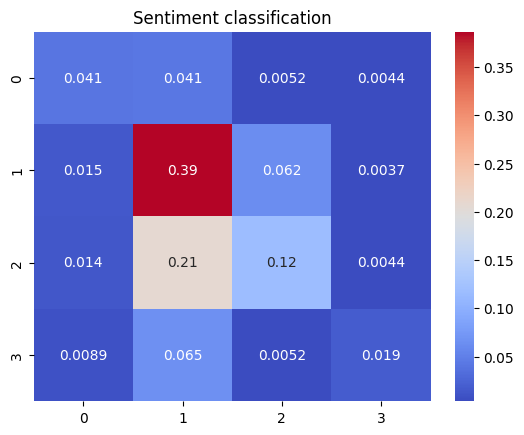

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_true= true_vals, y_pred = predicted_vals) / len(predicted_vals), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [30]:
model_path = "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/results/checkpoint-5070"

model = AutoModelForSequenceClassification.from_pretrained(
        model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [31]:
with torch.no_grad():
            text = "I personally would have hit that bitch and she'd never have done it again"
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            predicted_class_id = np.argmax(outputs.logits.numpy()[0])
            print(model.config.id2label[predicted_class_id])

3.1 casual use of gendered slurs, profanities, and insults


In [32]:
df = load_dataset("json", data_files={
        "train": f'preprocessed\label_vector_train.json', "validation": f'preprocessed\label_vector_valid.json'})
df["validation"]

Using custom data configuration default-5524bfb63d87410e
Found cached dataset json (C:/Users/mufdu/.cache/huggingface/datasets/json/default-5524bfb63d87410e/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/2 [00:00<?, ?it/s]

Dataset({
    features: ['idx', 'text', 'label'],
    num_rows: 1350
})

In [33]:
import pandas as pd
df = pd.DataFrame(df["validation"])
df = df.drop('idx', axis=1)
df.head()

,text,label
0,if you are a toxic pussy being yourself is not...,5
1,i look at the bright sense of the image trump ...,3
2,here is a retarded bitch that had a chinese sp...,3
3,my mom was a crack whore who put me on this pl...,5
4,sad that she was assaulted hopefully next time...,9


In [34]:
true_vals = df['label'].tolist()
# true_vals

In [35]:
predicted_vals = []
for t in df['text'].tolist():
    with torch.no_grad():
                inputs = tokenizer(t, return_tensors="pt")
                outputs = model(**inputs)
                predicted_class_id = np.argmax(outputs.logits.numpy()[0])
                predicted_vals.append(predicted_class_id)
                # print(model.config.id2label[predicted_class_id])

In [36]:
accuracy = accuracy_score(y_true = true_vals, y_pred = predicted_vals )
f1 = f1_score(y_true = true_vals, y_pred = predicted_vals, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = true_vals, y_pred = predicted_vals ))

The accuracy from sentiment classification: 0.3814814814814815
with f1 score: 0.28653469303953677
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00       101
           2       0.36      0.80      0.49       285
           3       0.37      0.40      0.38       267
           4       0.00      0.00      0.00        79
           5       0.42      0.69      0.52       254
           6       1.00      0.04      0.07       166
           7       0.00      0.00      0.00        25
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        30
          10       0.00      0.00      0.00       102

    accuracy                           0.38      1350
   macro avg       0.20      0.17      0.13      1350
weighted avg       0.35      0.38      0.29      1350



c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Sentiment classification')

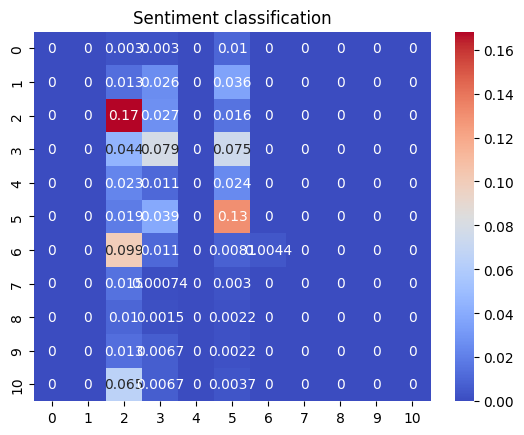

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_true= true_vals, y_pred = predicted_vals) / len(predicted_vals), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')